In [52]:
from nilearn import plotting
from nilearn.image import iter_img
from nilearn.plotting import plot_stat_map, show
from nilearn.regions import connected_regions
from nilearn.image import index_img
from nilearn import image
import numpy as np 
from nilearn.masking import apply_mask
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob
plt.figure(figsize=(8, 8))

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

# interrogate lme clusters

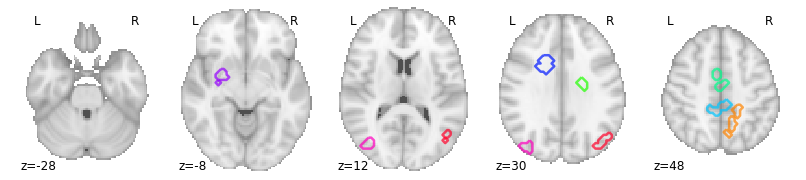

In [11]:

regions_img, index = connected_regions('lme_071520-cluster_roi_TxGroup-Time_F.nii.gz', min_region_size=100, extract_type='connected_components')

plotting.plot_prob_atlas(regions_img,
                         view_type='contours', display_mode='z',
                         cut_coords=5)

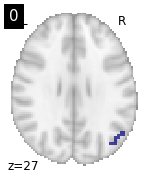

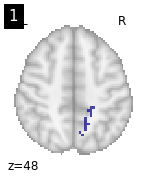

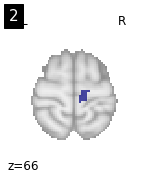

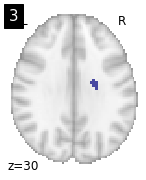

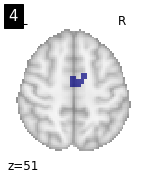

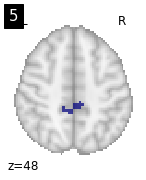

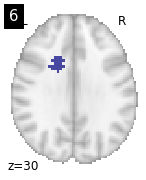

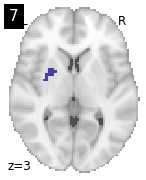

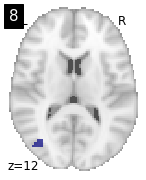

In [38]:

for i, cur_img in enumerate(iter_img(regions_img)):
    plotting.plot_roi(cur_img, display_mode="z", title="%d" % i, cut_coords = 1)


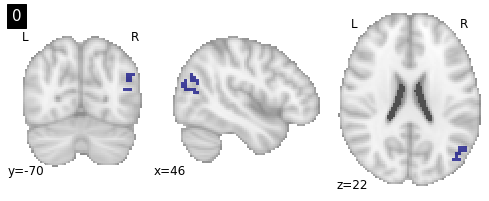

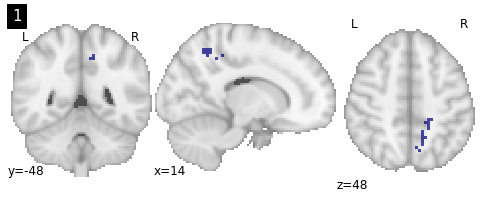

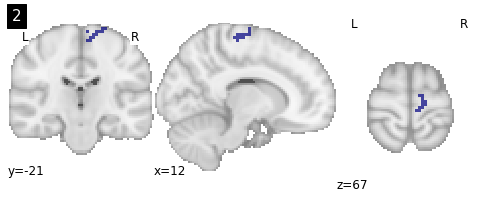

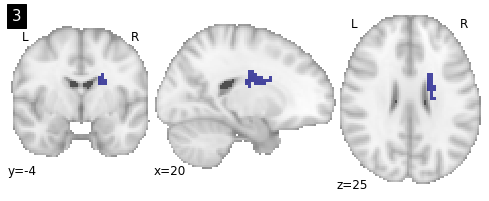

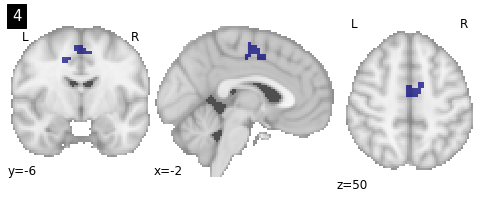

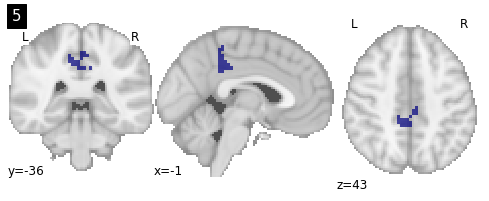

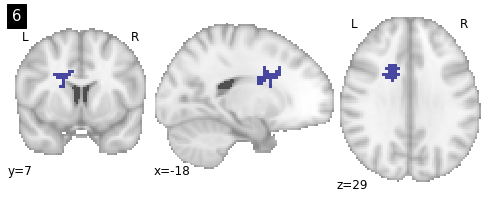

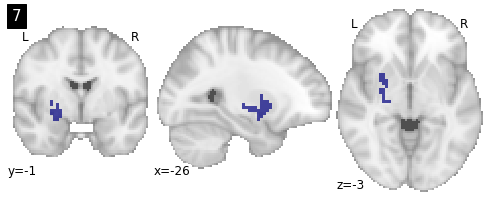

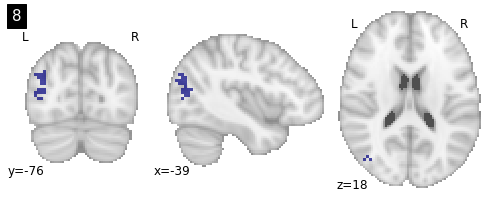

In [37]:

for i, cur_img in enumerate(iter_img(regions_img)):
    plotting.plot_roi(cur_img, display_mode="ortho", title="%d" % i, draw_cross = False)


In [18]:
ppi_list = glob.glob('/scratch/05201/bhickson/preprocdata/ppi/connected_regions_0005/level2/*/cope_sub-*_ses-*.nii.gz')

In [22]:

li=[]

for roi_ind, roi in enumerate(iter_img(regions_img)):
    for i in ppi_list:
        sub=i.split('cope_')[1].split('_')[0].split('-')[1]
        ses=i.split('cope_')[1].split('_')[1].split('-')[1].split('.')[0]
        mean_ppi = np.mean(apply_mask(i, image.math_img('img > 0', img = roi)))

        li.append([sub, ses, roi_ind, mean_ppi])


In [24]:

df = pd.DataFrame(li, columns = ['sid', 'time', 'roi', 'mean_ppi']) 
df

,sid,time,roi,mean_ppi
0,9070,A,0,0.079743
1,9100,A,0,-0.212348
2,2052,A,0,0.034151
3,2010,A,0,-0.050812
4,9079,A,0,-0.157810
...,...,...,...,...
1417,2028,B,8,-0.011118
1418,9020,B,8,0.008751
1419,2009,B,8,-0.025700
1420,2025,B,8,0.148789


In [25]:
df.time = df.time.map({'A': 'Pre', 'B': 'Post'}) 
df

,sid,time,roi,mean_ppi
0,9070,Pre,0,0.079743
1,9100,Pre,0,-0.212348
2,2052,Pre,0,0.034151
3,2010,Pre,0,-0.050812
4,9079,Pre,0,-0.157810
...,...,...,...,...
1417,2028,Post,8,-0.011118
1418,9020,Post,8,0.008751
1419,2009,Post,8,-0.025700
1420,2025,Post,8,0.148789


In [26]:
df_demogs = pd.read_csv('/scratch/05201/bhickson/LLLT-mixed_linear_effects_long.csv')

In [27]:
df_demogs.sid = df_demogs.sid.apply(str)

In [28]:
df_merged = df_demogs.merge(df, on = ['sid', 'time'])
df_merged

,sid,mci_status,tx_allocation,age,sex,education,time,task_difficulty,LowBackCorrect,MidBackCorrect,HiBackCorrect,LowBackRT,MidBackRT,HiBackRT,roi,mean_ppi
0,2006,MCI,Control,73.847,F,14.0,Pre,1.0,41.67,38.10,24.36,1398.01,1275.70,1512.73,0,0.120916
1,2006,MCI,Control,73.847,F,14.0,Pre,1.0,41.67,38.10,24.36,1398.01,1275.70,1512.73,1,0.090001
2,2006,MCI,Control,73.847,F,14.0,Pre,1.0,41.67,38.10,24.36,1398.01,1275.70,1512.73,2,-0.015183
3,2006,MCI,Control,73.847,F,14.0,Pre,1.0,41.67,38.10,24.36,1398.01,1275.70,1512.73,3,0.051373
4,2006,MCI,Control,73.847,F,14.0,Pre,1.0,41.67,38.10,24.36,1398.01,1275.70,1512.73,4,-0.126815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1327,9116,HC,Treatment,66.039,F,NaN,Post,0.0,43.06,48.81,33.33,764.66,871.71,693.05,4,-0.038282
1328,9116,HC,Treatment,66.039,F,NaN,Post,0.0,43.06,48.81,33.33,764.66,871.71,693.05,5,0.033239
1329,9116,HC,Treatment,66.039,F,NaN,Post,0.0,43.06,48.81,33.33,764.66,871.71,693.05,6,0.026644
1330,9116,HC,Treatment,66.039,F,NaN,Post,0.0,43.06,48.81,33.33,764.66,871.71,693.05,7,-0.042193


In [29]:
# compute z score
df_merged['mean_ppi_z'] = (df_merged.mean_ppi - df_merged.mean_ppi.mean())/df_merged.mean_ppi.std(ddof=0)

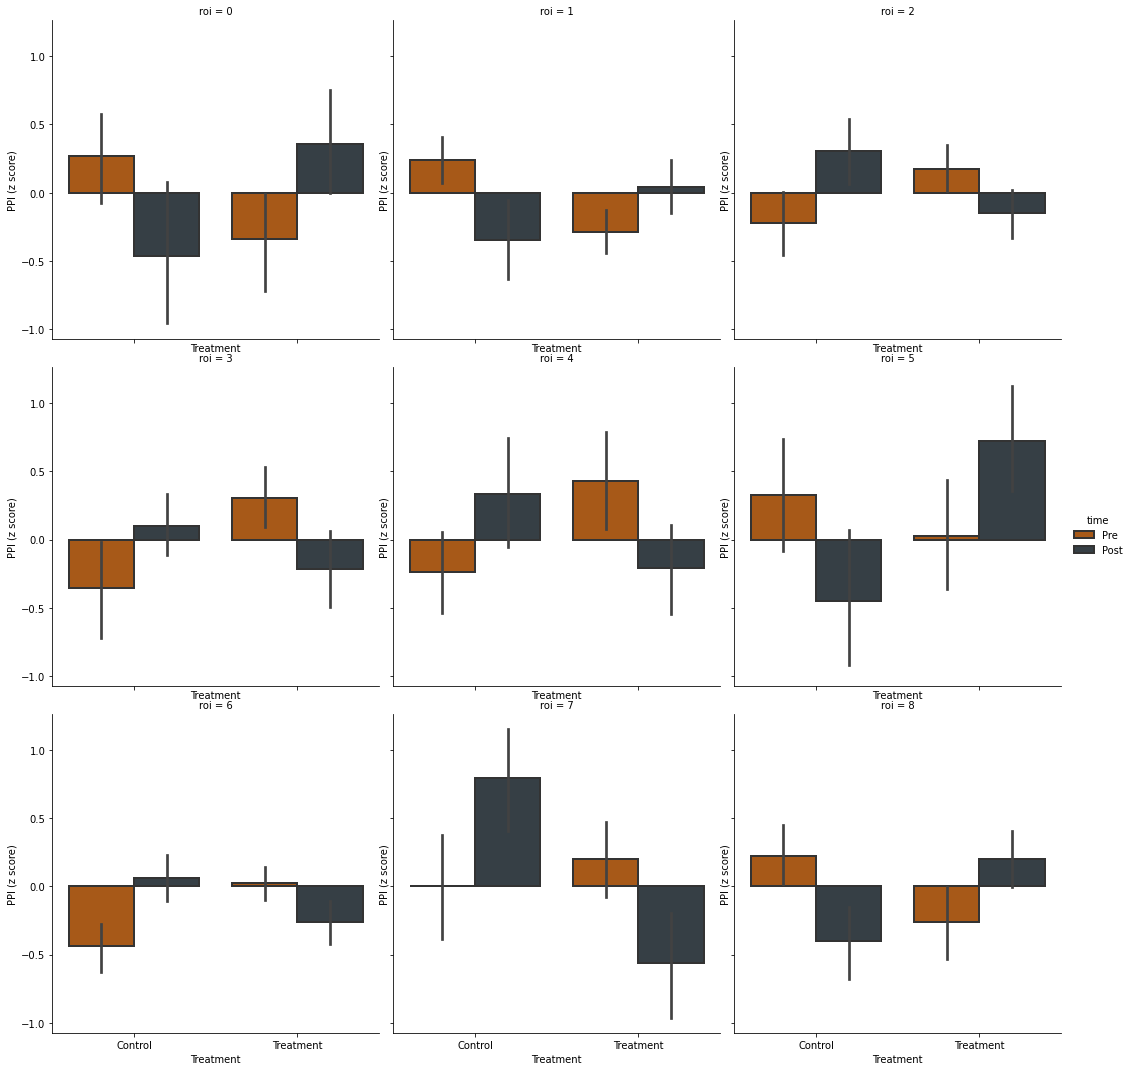

In [31]:


ax = sns.catplot(data=df_merged, x = 'tx_allocation', y = 'mean_ppi_z', col = 'roi', col_wrap = 3, hue= 'time', kind = 'bar', palette = ['#BF5700', '#333f48'], edgecolor = '.2', linewidth = 2)
ax.set(xlabel='Treatment', ylabel='PPI (z score)')

plt.show()

# interrogate the seed ROI

In [44]:

li=[]


for i in ppi_list:
    sub=i.split('cope_')[1].split('_')[0].split('-')[1]
    ses=i.split('cope_')[1].split('_')[1].split('-')[1].split('.')[0]
    mean_ppi = np.mean(apply_mask(i, image.math_img('img > 0', img = '/scratch/05201/bhickson/preprocdata/connected_regions_0005_bin.nii.gz')))

    li.append([sub, ses, mean_ppi])

df = pd.DataFrame(li, columns = ['sid', 'time', 'mean_ppi']) 


In [45]:

df = pd.DataFrame(li, columns = ['sid', 'time', 'mean_ppi']) 
df.time = df.time.map({'A': 'Pre', 'B': 'Post'}) 
df_merged = df_demogs.merge(df, on = ['sid', 'time'])
df_merged['mean_ppi_z'] = (df_merged.mean_ppi - df_merged.mean_ppi.mean())/df_merged.mean_ppi.std(ddof=0)

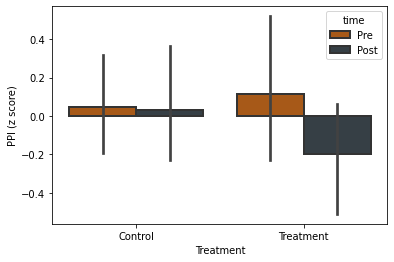

In [48]:
ax = sns.barplot(data=df_merged, x = 'tx_allocation', y = 'mean_ppi_z', hue= 'time', palette = ['#BF5700', '#333f48'], edgecolor = '.2', linewidth = 2)
ax.set(xlabel='Treatment', ylabel='PPI (z score)')

plt.show()

# interrogate BOLD LME

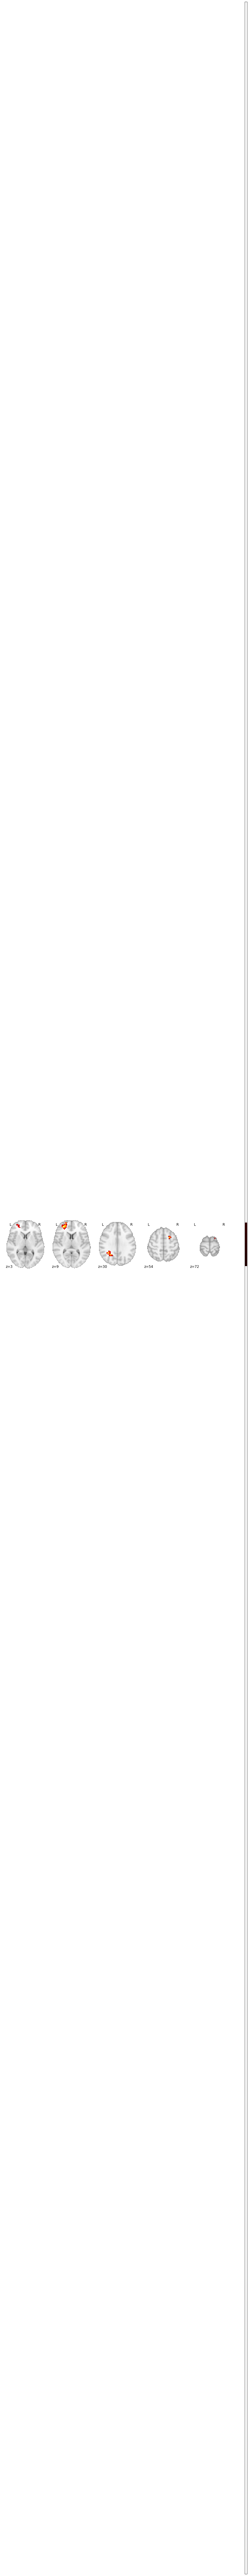

In [72]:
plotting.plot_stat_map('/scratch/05201/bhickson/preprocdata/bold_lme/lme-clusterized.nii.gz', display_mode='z', cut_coords=5, draw_cross = False)

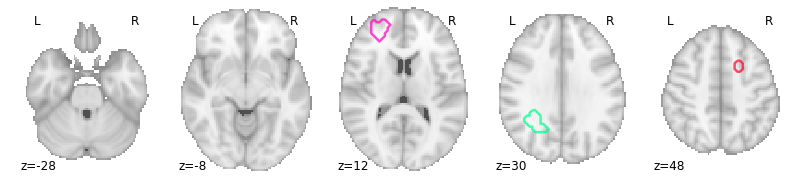

In [74]:

regions_img, index = connected_regions('/scratch/05201/bhickson/preprocdata/bold_lme/lme-cluster_roi_Time_TxGroup_F.nii.gz', min_region_size=100, extract_type='connected_components')

plotting.plot_prob_atlas(regions_img, 
                         view_type='contours', display_mode='z',
                         cut_coords=5)

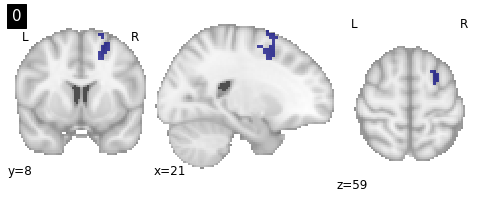

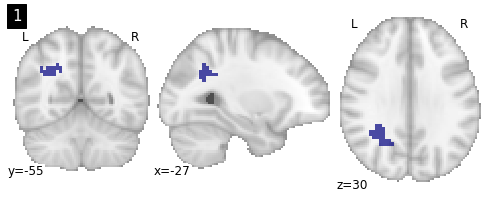

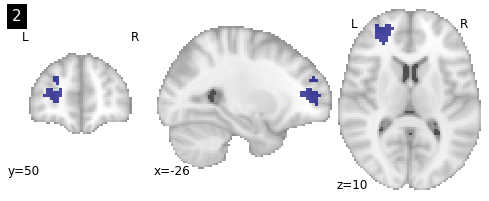

In [56]:

for i, cur_img in enumerate(iter_img(regions_img)):
    plotting.plot_roi(cur_img, display_mode="ortho", title="%d" % i, draw_cross = False)


In [59]:
! ls /scratch/05201/bhickson/preprocdata/level2/noGSR/A

cope  L2  Level2_wf


In [60]:
bold_list = sorted(glob.glob('/scratch/05201/bhickson/preprocdata/level2/noGSR/*/L2/stats_dir/stats/cope_sub-*'))

In [61]:

li=[]

for roi_ind, roi in enumerate(iter_img(regions_img)):
    for i in bold_list:
        sub=i.split('cope_')[1].split('_')[0].split('-')[1]
        ses=i.split('cope_')[1].split('_')[1].split('-')[1].split('.')[0]
        mean_ppi = np.mean(apply_mask(i, image.math_img('img > 0', img = roi)))

        li.append([sub, ses, roi_ind, mean_ppi])


In [63]:

df = pd.DataFrame(li, columns = ['sid', 'time', 'roi', 'mean_bold']) 
df

,sid,time,roi,mean_bold
0,2003,A,0,1.233384
1,2006,A,0,0.524842
2,2007,A,0,-0.877298
3,2009,A,0,1.736415
4,2010,A,0,0.723958
...,...,...,...,...
469,9105,B,2,0.594461
470,9107,B,2,0.592171
471,9109,B,2,-1.065049
472,9110,B,2,0.394896


In [64]:
df.time = df.time.map({'A': 'Pre', 'B': 'Post'}) 
df

,sid,time,roi,mean_bold
0,2003,Pre,0,1.233384
1,2006,Pre,0,0.524842
2,2007,Pre,0,-0.877298
3,2009,Pre,0,1.736415
4,2010,Pre,0,0.723958
...,...,...,...,...
469,9105,Post,2,0.594461
470,9107,Post,2,0.592171
471,9109,Post,2,-1.065049
472,9110,Post,2,0.394896


In [65]:
df_demogs = pd.read_csv('/scratch/05201/bhickson/LLLT-mixed_linear_effects_long.csv')

In [66]:
df_demogs.sid = df_demogs.sid.apply(str)

In [67]:
df_merged = df_demogs.merge(df, on = ['sid', 'time'])
df_merged

,sid,mci_status,tx_allocation,age,sex,education,time,task_difficulty,LowBackCorrect,MidBackCorrect,HiBackCorrect,LowBackRT,MidBackRT,HiBackRT,roi,mean_bold
0,2006,MCI,Control,73.847,F,14.0,Pre,1.0,41.67,38.10,24.36,1398.01,1275.70,1512.73,0,0.524842
1,2006,MCI,Control,73.847,F,14.0,Pre,1.0,41.67,38.10,24.36,1398.01,1275.70,1512.73,1,0.957154
2,2006,MCI,Control,73.847,F,14.0,Pre,1.0,41.67,38.10,24.36,1398.01,1275.70,1512.73,2,-1.255336
3,2006,MCI,Control,73.847,F,14.0,Post,0.0,38.89,36.90,32.05,1341.18,1166.58,1429.63,0,1.754338
4,2006,MCI,Control,73.847,F,14.0,Post,0.0,38.89,36.90,32.05,1341.18,1166.58,1429.63,1,1.533352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439,9116,HC,Treatment,66.039,F,NaN,Pre,0.0,34.72,33.33,25.64,700.28,773.42,690.42,1,0.934964
440,9116,HC,Treatment,66.039,F,NaN,Pre,0.0,34.72,33.33,25.64,700.28,773.42,690.42,2,-1.009630
441,9116,HC,Treatment,66.039,F,NaN,Post,0.0,43.06,48.81,33.33,764.66,871.71,693.05,0,4.599516
442,9116,HC,Treatment,66.039,F,NaN,Post,0.0,43.06,48.81,33.33,764.66,871.71,693.05,1,-3.728505


In [68]:
# compute z score
df_merged['mean_bold_z'] = (df_merged.mean_bold - df_merged.mean_bold.mean())/df_merged.mean_bold.std(ddof=0)

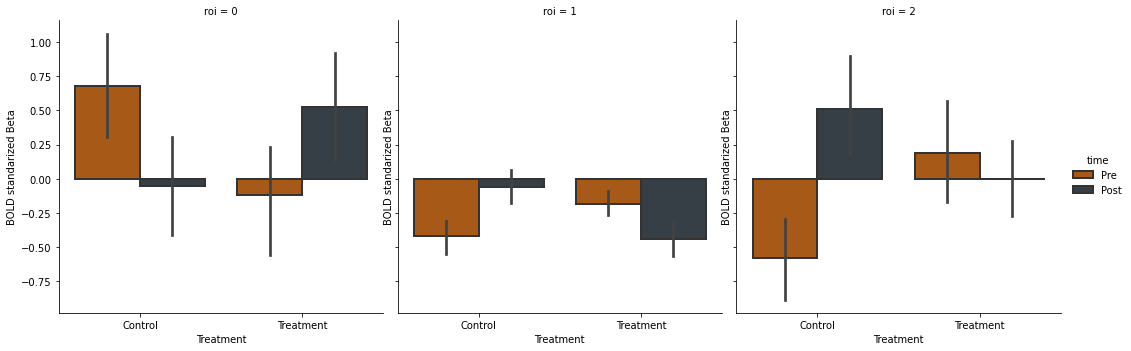

In [69]:


ax = sns.catplot(data=df_merged, x = 'tx_allocation', y = 'mean_bold_z', col = 'roi', col_wrap = 3, hue= 'time', kind = 'bar', palette = ['#BF5700', '#333f48'], edgecolor = '.2', linewidth = 2)
ax.set(xlabel='Treatment', ylabel='BOLD standarized Beta')

plt.show()